# *INDIA vs NEW ZEALAND, 3rd ODI MATCH, INDORE*

# DATA EXTRACTION & UPDATION

In [1]:
import pandas as pd
import numpy as np

### PER BALL BATTING SCORECARD - INDIA

In [2]:
d=pd.read_csv("IndBattingvsNZ.csv").drop("Unnamed: 0",axis=1)
d

,PlayerName,Score,Wicket,DismissalWay,Ball
0,Rohit Sharma,4,No,No,0.1
1,Rohit Sharma,0,No,No,0.2
2,Rohit Sharma,0,No,No,0.3
3,Rohit Sharma,0,No,No,0.4
4,Rohit Sharma,0,No,No,0.5
...,...,...,...,...,...
288,Virat Kohli,8,No,No,45.4
289,Virat Kohli,0,Yes,caught,45.4
290,Arshdeep Singh,4,No,No,45.5
291,Kuldeep Yadav,8,No,No,45.6


In [3]:
d[d["Score"]>6]

,PlayerName,Score,Wicket,DismissalWay,Ball
24,Rohit Sharma,8,No,No,3.6
42,Shubman Gill (c),8,No,No,6.4
71,Shreyas Iyer (vc),8,No,No,11.2
81,KL Rahul (wk),8,No,No,12.5
171,Nitish Kumar Reddy,8,No,No,27.3
200,Ravindra Jadeja,8,No,No,32.1
274,Harshit Rana,8,No,No,43.4
276,Mohd Siraj,8,No,No,43.5
288,Virat Kohli,8,No,No,45.4
291,Kuldeep Yadav,8,No,No,45.6


>The code to record runs hence wickets as per, was made in such a way that ensures every number except 0-6(from 0-9) will be recorded as a Wicket like 7,8,9 cause 0-6 are numbers which are used in cricket.
So, we need to remove such data which includes score equalling to 7/8/9.

In [4]:
d=d.drop([24,42,71,81,171,200,274,276,288,291],axis=0)   # removed the above explained rows

In [5]:
d[d["Score"]>6]     # rechecking 

,PlayerName,Score,Wicket,DismissalWay,Ball


In [6]:
d.reset_index(inplace=True)    # dropping rows led to skipping index hence resetting the index

In [7]:
d=d.drop("index",axis=1)
d

,PlayerName,Score,Wicket,DismissalWay,Ball
0,Rohit Sharma,4,No,No,0.1
1,Rohit Sharma,0,No,No,0.2
2,Rohit Sharma,0,No,No,0.3
3,Rohit Sharma,0,No,No,0.4
4,Rohit Sharma,0,No,No,0.5
...,...,...,...,...,...
278,Virat Kohli,4,No,No,45.2
279,Virat Kohli,0,No,No,45.3
280,Virat Kohli,0,Yes,caught,45.4
281,Arshdeep Singh,4,No,No,45.5


In [8]:
# converted df to list to add a few rows which couldn't be added live cause those the code had not those functions as of then
l=list(d.values.tolist())    
l

[['Rohit Sharma', 4, 'No', 'No', '0.1'],
 ['Rohit Sharma', 0, 'No', 'No', '0.2'],
 ['Rohit Sharma', 0, 'No', 'No', '0.3'],
 ['Rohit Sharma', 0, 'No', 'No', '0.4'],
 ['Rohit Sharma', 0, 'No', 'No', '0.5'],
 ['Rohit Sharma', 0, 'No', 'No', '0.6'],
 ['Extras', 1, 'No', 'No', '1.1.n'],
 ['Rohit Sharma', 2, 'No', 'No', '1.1'],
 ['Rohit Sharma', 0, 'No', 'No', '1.2'],
 ['Rohit Sharma', 1, 'No', 'No', '1.3'],
 ['Shubman Gill (c)', 0, 'No', 'No', '1.4'],
 ['Shubman Gill (c)', 4, 'No', 'No', '1.5'],
 ['Shubman Gill (c)', 1, 'No', 'No', '1.6'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.1'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.2'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.3'],
 ['Shubman Gill (c)', 4, 'No', 'No', '2.4'],
 ['Shubman Gill (c)', 4, 'No', 'No', '2.5'],
 ['Shubman Gill (c)', 1, 'No', 'No', '2.6'],
 ['Shubman Gill (c)', 0, 'No', 'No', '3.1'],
 ['Shubman Gill (c)', 1, 'No', 'No', '3.2'],
 ['Rohit Sharma', 0, 'No', 'No', '3.3'],
 ['Rohit Sharma', 0, 'No', 'No', '3.4'],
 ['Rohit Sharma',

In [9]:
# 1 - insert noball + run  @ 1.1 over
l.insert(7,["Shubman Gill (c)",1,"No","No","1.1"])     

In [10]:
l.index(['Extras', 1, 'No', 'No', '37.6.w'])       # index to insert another skipped score

231

In [11]:
# 2 - insert legbye + run @ 37.6 over after wide
l.insert(232,["Extras",1,"No","No","37.6.lb"]) 

# 3 - remove the combination ball (legbye run mixed with a player's scorecard) and update player's score to 0
l.remove(['Harshit Rana', 1, 'No', 'No', '37.6'])
l.insert(233,['Harshit Rana', 0, 'No', 'No', '37.6'])

In [12]:
# 4 - mistakenly added another player in place of someone
l.remove(['Kuldeep Yadav', 0, 'Yes', 'runout', '45.6'])
l.insert(284,["Arshdeep Singh",0,"No","No","45.6"])
l.insert(285,["Kuldeep Yadav",0,"Yes","runout","45.6"])   # since he was runout, so this ball would be subtracted from his total balls at the end

In [13]:
l

[['Rohit Sharma', 4, 'No', 'No', '0.1'],
 ['Rohit Sharma', 0, 'No', 'No', '0.2'],
 ['Rohit Sharma', 0, 'No', 'No', '0.3'],
 ['Rohit Sharma', 0, 'No', 'No', '0.4'],
 ['Rohit Sharma', 0, 'No', 'No', '0.5'],
 ['Rohit Sharma', 0, 'No', 'No', '0.6'],
 ['Extras', 1, 'No', 'No', '1.1.n'],
 ['Shubman Gill (c)', 1, 'No', 'No', '1.1'],
 ['Rohit Sharma', 2, 'No', 'No', '1.1'],
 ['Rohit Sharma', 0, 'No', 'No', '1.2'],
 ['Rohit Sharma', 1, 'No', 'No', '1.3'],
 ['Shubman Gill (c)', 0, 'No', 'No', '1.4'],
 ['Shubman Gill (c)', 4, 'No', 'No', '1.5'],
 ['Shubman Gill (c)', 1, 'No', 'No', '1.6'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.1'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.2'],
 ['Shubman Gill (c)', 0, 'No', 'No', '2.3'],
 ['Shubman Gill (c)', 4, 'No', 'No', '2.4'],
 ['Shubman Gill (c)', 4, 'No', 'No', '2.5'],
 ['Shubman Gill (c)', 1, 'No', 'No', '2.6'],
 ['Shubman Gill (c)', 0, 'No', 'No', '3.1'],
 ['Shubman Gill (c)', 1, 'No', 'No', '3.2'],
 ['Rohit Sharma', 0, 'No', 'No', '3.3'],
 ['Rohit Shar

In [14]:
df=pd.DataFrame(l,columns=d.columns)
df

,PlayerName,Score,Wicket,DismissalWay,Ball
0,Rohit Sharma,4,No,No,0.1
1,Rohit Sharma,0,No,No,0.2
2,Rohit Sharma,0,No,No,0.3
3,Rohit Sharma,0,No,No,0.4
4,Rohit Sharma,0,No,No,0.5
...,...,...,...,...,...
281,Virat Kohli,0,No,No,45.3
282,Virat Kohli,0,Yes,caught,45.4
283,Arshdeep Singh,4,No,No,45.5
284,Arshdeep Singh,0,No,No,45.6


In [15]:
# adding a new column "Overs"
o=[]
for k in df["Ball"]:
    kk=k.split(".")
    o.append(int(kk[0])+1)
df["Overs"]=o

In [16]:
df["Score"].values

array([4, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 4, 1, 0, 0, 0, 4, 4, 1, 0, 1,
       0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 6, 1, 0, 1, 4, 0, 0,
       0, 0, 0, 1, 1, 4, 0, 1, 0, 4, 0, 0, 1, 0, 0, 4, 4, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 4, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 4, 1, 1,
       1, 3, 6, 0, 1, 1, 1, 1, 1, 6, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 4, 0, 2, 1, 1, 4, 0, 0,
       0, 4, 1, 6, 0, 0, 6, 0, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1,
       4, 0, 1, 1, 0, 1, 6, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 1, 4, 1, 1, 6,
       2, 1, 6, 1, 6, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 0, 0, 4, 0, 0])

In [17]:
# cum-sum scores + appended to dataframe
p=list(np.cumsum(df["Score"].values))
df["Cum-Sum Score"]=p
p

[4,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 8,
 8,
 9,
 9,
 13,
 14,
 14,
 14,
 14,
 18,
 22,
 23,
 23,
 24,
 24,
 24,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 31,
 32,
 33,
 39,
 40,
 40,
 41,
 45,
 45,
 45,
 45,
 45,
 45,
 46,
 47,
 51,
 51,
 52,
 52,
 56,
 56,
 56,
 57,
 57,
 57,
 61,
 65,
 65,
 66,
 66,
 67,
 67,
 67,
 67,
 68,
 68,
 68,
 69,
 70,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 72,
 76,
 76,
 77,
 77,
 78,
 79,
 79,
 80,
 81,
 81,
 82,
 82,
 82,
 82,
 82,
 83,
 83,
 83,
 84,
 84,
 86,
 87,
 88,
 89,
 90,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 97,
 98,
 102,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 117,
 118,
 119,
 120,
 121,
 122,
 122,
 122,
 123,
 123,
 124,
 125,
 125,
 127,
 128,
 129,
 129,
 133,
 134,
 135,
 136,
 139,
 145,
 145,
 146,
 147,
 148,
 149,
 150,
 156,
 156,
 157,
 157,
 159,
 159,
 159,
 159,
 160,
 161,
 161,
 161,
 162,
 163,
 164,
 165,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 173,
 

In [18]:
# Cum-Sum wicket + appending to the dataframe
w=[]
a=0
for k in df["Wicket"]:
    if k=="Yes":
        a=a+1
        w.append(a)
    else:
        a=a
        w.append(a)
df["Cum-Sum Wickets"]=w
w

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [19]:
l=list(df['Ball'].values)

In [20]:
len(l)

286

In [21]:
t=[]
for k in l:
    if k.endswith(".w"):
        t.append("Wide Ball")
    elif k.endswith(".n"):
        t.append("No-Ball")
    elif k.endswith(".lb"):
        t.append("Leg By")
    else:
        t.append("Legal Ball")
df["Ball Type"]=t

In [22]:
df    # per ball scorecard of India

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
0,Rohit Sharma,4,No,No,0.1,1,4,0,Legal Ball
1,Rohit Sharma,0,No,No,0.2,1,4,0,Legal Ball
2,Rohit Sharma,0,No,No,0.3,1,4,0,Legal Ball
3,Rohit Sharma,0,No,No,0.4,1,4,0,Legal Ball
4,Rohit Sharma,0,No,No,0.5,1,4,0,Legal Ball
...,...,...,...,...,...,...,...,...,...
281,Virat Kohli,0,No,No,45.3,46,292,8,Legal Ball
282,Virat Kohli,0,Yes,caught,45.4,46,292,9,Legal Ball
283,Arshdeep Singh,4,No,No,45.5,46,296,9,Legal Ball
284,Arshdeep Singh,0,No,No,45.6,46,296,9,Legal Ball


###  OVERALL SCORECARD - INDIA

In [23]:
# since "Extras(Extra runs)" was considered along with playernames, hence we first need to drop it to make a proper player scorecard
p=list(df["PlayerName"].unique())
p.remove("Extras")
p

['Rohit Sharma',
 'Shubman Gill (c)',
 'Virat Kohli',
 'Shreyas Iyer (vc)',
 'KL Rahul (wk)',
 'Nitish Kumar Reddy',
 'Ravindra Jadeja',
 'Harshit Rana',
 'Mohd Siraj',
 'Kuldeep Yadav',
 'Arshdeep Singh']

In [24]:
# create a dataframe with all the unique players
scorecard=pd.DataFrame({"Players":p})
scorecard

,Players
0,Rohit Sharma
1,Shubman Gill (c)
2,Virat Kohli
3,Shreyas Iyer (vc)
4,KL Rahul (wk)
5,Nitish Kumar Reddy
6,Ravindra Jadeja
7,Harshit Rana
8,Mohd Siraj
9,Kuldeep Yadav


In [25]:
# total runs scored by each player
s=[]
for k in p:
    d=df[df["PlayerName"]==k]
    s.append(d["Score"].sum())
scorecard["Runs"]=s
s

[11, 23, 124, 3, 1, 53, 12, 52, 0, 5, 4]

In [26]:
# total balls played by each player
b=[]
for k in p:
    d=df[df["PlayerName"]==k]
    if any(d["DismissalWay"]=="runout"):    # since one player got out via runout while being a 'non-striker',hence had to reduce one ball from his account
        b.append(len(d["Ball"])-1)
    else:
        b.append(len(d["Ball"]))
scorecard["Balls"]=b
b

[13, 18, 108, 10, 6, 57, 16, 43, 1, 3, 2]

In [27]:
# total unique runs hit by each player
zero=[]
one=[]
two=[]
three=[]
four=[]
six=[]
for k in p:
    d=df[df["PlayerName"]==k]
    zero.append(len(d[d["Score"]==0]))
    one.append(len(d[d["Score"]==1]))
    two.append(len(d[d["Score"]==2]))
    three.append(len(d[d["Score"]==3]))
    four.append(len(d[d["Score"]==4]))
    six.append(len(d[d["Score"]==6]))
scorecard["0s"]=zero
scorecard["1s"]=one
scorecard["2s"]=two
scorecard["3s"]=three
scorecard["4s"]=four
scorecard["6s"]=six

In [28]:
# strike rate of each player
m=scorecard["Runs"]/scorecard["Balls"] * 100
scorecard["Strike Rate"]=np.round(m.values,2)

In [29]:
# total balls played ---> converted to total number of overs played
ovs=scorecard["Balls"]//6 + np.mod(scorecard["Balls"],6)/10
scorecard["Total Overs Played"]=ovs

In [30]:
# Boundary runs hit by each player
bound=(scorecard["4s"]*4) + (scorecard["6s"]*6)
scorecard["Boundary Runs"]=bound

In [31]:
# Non-Boundary runs hit by each player
nobound=(scorecard["1s"]*1) + (scorecard["2s"]*2) + (scorecard["3s"]*3) 
scorecard["Non-Boundary Runs"]=nobound

In [32]:
# Run Rate by each player
runrate=scorecard["Runs"]/scorecard["Total Overs Played"]
scorecard["Player Run Rate"]=np.round(runrate,1)

In [33]:
# role players perform in the team
role={"Rohit Sharma":"Batsman","Shubman Gill (c)":"Batsman","Virat Kohli":"Batsman","Shreyas Iyer (vc)":"Batsman",
     "KL Rahul (wk)":"Batsman","Nitish Kumar Reddy":"All-Rounder","Ravindra Jadeja":"All-Rounder","Harshit Rana":"Bowler",
     "Mohd Siraj":"Bowler","Kuldeep Yadav":"Bowler","Arshdeep Singh":"Bowler"}
scorecard["Role"]=scorecard["Players"].map(role)

In [34]:
scorecard

,Players,Runs,Balls,0s,1s,2s,3s,4s,6s,Strike Rate,Total Overs Played,Boundary Runs,Non-Boundary Runs,Player Run Rate,Role
0,Rohit Sharma,11,13,9,1,1,0,2,0,84.62,2.1,8,3,5.2,Batsman
1,Shubman Gill (c),23,18,7,7,0,0,4,0,127.78,3.0,16,7,7.7,Batsman
2,Virat Kohli,124,108,36,53,5,1,10,3,114.81,18.0,58,66,6.9,Batsman
3,Shreyas Iyer (vc),3,10,7,3,0,0,0,0,30.00,1.4,0,3,2.1,Batsman
4,KL Rahul (wk),1,6,5,1,0,0,0,0,16.67,1.0,0,1,1.0,Batsman
5,Nitish Kumar Reddy,53,57,22,29,2,0,2,2,92.98,9.3,20,33,5.7,All-Rounder
6,Ravindra Jadeja,12,16,5,10,1,0,0,0,75.00,2.4,0,12,5.0,All-Rounder
7,Harshit Rana,52,43,24,10,1,0,4,4,120.93,7.1,40,12,7.3,Bowler
8,Mohd Siraj,0,1,1,0,0,0,0,0,0.00,0.1,0,0,0.0,Bowler
9,Kuldeep Yadav,5,3,2,1,0,0,1,0,166.67,0.3,4,1,16.7,Bowler


### PARTNERSHIPS

In [35]:
df[df["Wicket"]=="Yes"]

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
25,Rohit Sharma,0,Yes,caught,3.6,4,28,1,Legal Ball
42,Shubman Gill (c),0,Yes,bowled,6.4,7,45,2,Legal Ball
70,Shreyas Iyer (vc),0,Yes,caught,11.2,12,68,3,Legal Ball
79,KL Rahul (wk),0,Yes,caught,12.5,13,71,4,Legal Ball
168,Nitish Kumar Reddy,0,Yes,caught,27.3,28,159,5,Legal Ball
196,Ravindra Jadeja,0,Yes,caught,32.1,33,178,6,Legal Ball
270,Harshit Rana,0,Yes,caught,43.4,44,277,7,Legal Ball
271,Mohd Siraj,0,Yes,caught,43.5,44,277,8,Legal Ball
282,Virat Kohli,0,Yes,caught,45.4,46,292,9,Legal Ball
285,Kuldeep Yadav,0,Yes,runout,45.6,46,296,10,Legal Ball


In [36]:
# indexes when wickets fell + 1 (cause of the natural tendency of index to take -1 from the ending index value)
i=list(df[df["Wicket"]=="Yes"].index)
ii=[]
for k in i:
    ii.append(k+1)
ii.insert(0,0)
ii

[0, 26, 43, 71, 80, 169, 197, 271, 272, 283, 286]

In [37]:
ps=[]
pp=[]
for k in range(len(ii)-1):
    z=df.iloc[ii[k]:ii[k+1]]
    zz=df.iloc[ii[k]:ii[k+1]]
    ps.append(z["Score"].sum())                   # partnership scores
    pp.append(list(z["PlayerName"].unique()))     # players in that partnership

In [38]:
pp

[['Rohit Sharma', 'Extras', 'Shubman Gill (c)'],
 ['Shubman Gill (c)', 'Virat Kohli', 'Extras'],
 ['Shreyas Iyer (vc)', 'Virat Kohli'],
 ['KL Rahul (wk)', 'Virat Kohli'],
 ['Nitish Kumar Reddy', 'Virat Kohli', 'Extras'],
 ['Ravindra Jadeja', 'Virat Kohli'],
 ['Harshit Rana', 'Virat Kohli', 'Extras'],
 ['Mohd Siraj'],
 ['Kuldeep Yadav', 'Virat Kohli'],
 ['Arshdeep Singh', 'Kuldeep Yadav']]

In [39]:
for k in pp:
    if "Extras" in k:
        k.remove("Extras")

In [40]:
ps   # partnership scores

[28, 17, 23, 3, 88, 19, 99, 0, 15, 4]

In [41]:
pp     # partnership jodis

[['Rohit Sharma', 'Shubman Gill (c)'],
 ['Shubman Gill (c)', 'Virat Kohli'],
 ['Shreyas Iyer (vc)', 'Virat Kohli'],
 ['KL Rahul (wk)', 'Virat Kohli'],
 ['Nitish Kumar Reddy', 'Virat Kohli'],
 ['Ravindra Jadeja', 'Virat Kohli'],
 ['Harshit Rana', 'Virat Kohli'],
 ['Mohd Siraj'],
 ['Kuldeep Yadav', 'Virat Kohli'],
 ['Arshdeep Singh', 'Kuldeep Yadav']]

In [42]:
pp.remove(["Mohd Siraj"])
pp.insert(7,["Mohd Siraj","Virat Kohli"])

In [43]:
p1=[k[0] for k in pp]
p2=[k[1] for k in pp]

In [44]:
partner=pd.DataFrame({"Partner1":p1,"Partner2":p2,"Runs Scored":ps})
partner

,Partner1,Partner2,Runs Scored
0,Rohit Sharma,Shubman Gill (c),28
1,Shubman Gill (c),Virat Kohli,17
2,Shreyas Iyer (vc),Virat Kohli,23
3,KL Rahul (wk),Virat Kohli,3
4,Nitish Kumar Reddy,Virat Kohli,88
5,Ravindra Jadeja,Virat Kohli,19
6,Harshit Rana,Virat Kohli,99
7,Mohd Siraj,Virat Kohli,0
8,Kuldeep Yadav,Virat Kohli,15
9,Arshdeep Singh,Kuldeep Yadav,4


### Wickets 

In [45]:
wick=df[df["Wicket"]=="Yes"]
wick.drop(["Score","Wicket","Cum-Sum Wickets"],axis=1)
wick

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
25,Rohit Sharma,0,Yes,caught,3.6,4,28,1,Legal Ball
42,Shubman Gill (c),0,Yes,bowled,6.4,7,45,2,Legal Ball
70,Shreyas Iyer (vc),0,Yes,caught,11.2,12,68,3,Legal Ball
79,KL Rahul (wk),0,Yes,caught,12.5,13,71,4,Legal Ball
168,Nitish Kumar Reddy,0,Yes,caught,27.3,28,159,5,Legal Ball
196,Ravindra Jadeja,0,Yes,caught,32.1,33,178,6,Legal Ball
270,Harshit Rana,0,Yes,caught,43.4,44,277,7,Legal Ball
271,Mohd Siraj,0,Yes,caught,43.5,44,277,8,Legal Ball
282,Virat Kohli,0,Yes,caught,45.4,46,292,9,Legal Ball
285,Kuldeep Yadav,0,Yes,runout,45.6,46,296,10,Legal Ball


### Overs

In [46]:
df["Overs"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [47]:
# dataframe to analyse total runs scored and total wickets fell per over
overrun={}
ww=[]
for k in range(len(df["Overs"].unique())):
    x=df[df["Overs"]==k+1]
    overrun[k+1]=x["Score"].sum()
    ww.append(len(x[x["Wicket"]=="Yes"]))

In [48]:
Or=pd.DataFrame({"Overs":overrun.keys(),"Runs Scored":overrun.values(),"No. of Wickets":ww})

In [49]:
# run rate per over
rs=np.cumsum(Or["Runs Scored"].values)
ss=Or["Overs"].values
overrate=rs/ss
Or["Run Rate after every Over"]=np.round(overrate,1)

In [50]:
rs

array([  4,  14,  23,  28,  29,  40,  45,  51,  57,  66,  68,  70,  71,
        78,  82,  83,  88,  93,  98, 108, 113, 118, 122, 127, 135, 147,
       157, 160, 164, 170, 175, 178, 179, 181, 187, 195, 206, 219, 221,
       230, 240, 249, 270, 277, 284, 296])

In [51]:
ss

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [52]:
Or

,Overs,Runs Scored,No. of Wickets,Run Rate after every Over
0,1,4,0,4.0
1,2,10,0,7.0
2,3,9,0,7.7
3,4,5,1,7.0
4,5,1,0,5.8
5,6,11,0,6.7
6,7,5,1,6.4
7,8,6,0,6.4
8,9,6,0,6.3
9,10,9,0,6.6


### EXTRAS

In [53]:
extra=df[df["PlayerName"]=="Extras"]

In [54]:
a=list(extra["Ball"].values)
a

['1.1.n', '5.1.w', '19.3.w', '37.6.w', '37.6.lb', '41.3.w', '41.6.w', '42.3.w']

In [55]:
extra

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
6,Extras,1,No,No,1.1.n,2,5,0,No-Ball
32,Extras,1,No,No,5.1.w,6,30,1,Wide Ball
119,Extras,1,No,No,19.3.w,20,103,4,Wide Ball
231,Extras,1,No,No,37.6.w,38,218,6,Wide Ball
232,Extras,1,No,No,37.6.lb,38,219,6,Leg By
254,Extras,1,No,No,41.3.w,42,241,6,Wide Ball
258,Extras,1,No,No,41.6.w,42,248,6,Wide Ball
262,Extras,1,No,No,42.3.w,43,255,6,Wide Ball


# 

# FINAL DATASETS

In [56]:
df     # per ball scorecard of India Batting

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
0,Rohit Sharma,4,No,No,0.1,1,4,0,Legal Ball
1,Rohit Sharma,0,No,No,0.2,1,4,0,Legal Ball
2,Rohit Sharma,0,No,No,0.3,1,4,0,Legal Ball
3,Rohit Sharma,0,No,No,0.4,1,4,0,Legal Ball
4,Rohit Sharma,0,No,No,0.5,1,4,0,Legal Ball
...,...,...,...,...,...,...,...,...,...
281,Virat Kohli,0,No,No,45.3,46,292,8,Legal Ball
282,Virat Kohli,0,Yes,caught,45.4,46,292,9,Legal Ball
283,Arshdeep Singh,4,No,No,45.5,46,296,9,Legal Ball
284,Arshdeep Singh,0,No,No,45.6,46,296,9,Legal Ball


In [57]:
scorecard    # player wise scorecard of the match

,Players,Runs,Balls,0s,1s,2s,3s,4s,6s,Strike Rate,Total Overs Played,Boundary Runs,Non-Boundary Runs,Player Run Rate,Role
0,Rohit Sharma,11,13,9,1,1,0,2,0,84.62,2.1,8,3,5.2,Batsman
1,Shubman Gill (c),23,18,7,7,0,0,4,0,127.78,3.0,16,7,7.7,Batsman
2,Virat Kohli,124,108,36,53,5,1,10,3,114.81,18.0,58,66,6.9,Batsman
3,Shreyas Iyer (vc),3,10,7,3,0,0,0,0,30.00,1.4,0,3,2.1,Batsman
4,KL Rahul (wk),1,6,5,1,0,0,0,0,16.67,1.0,0,1,1.0,Batsman
5,Nitish Kumar Reddy,53,57,22,29,2,0,2,2,92.98,9.3,20,33,5.7,All-Rounder
6,Ravindra Jadeja,12,16,5,10,1,0,0,0,75.00,2.4,0,12,5.0,All-Rounder
7,Harshit Rana,52,43,24,10,1,0,4,4,120.93,7.1,40,12,7.3,Bowler
8,Mohd Siraj,0,1,1,0,0,0,0,0,0.00,0.1,0,0,0.0,Bowler
9,Kuldeep Yadav,5,3,2,1,0,0,1,0,166.67,0.3,4,1,16.7,Bowler


In [58]:
partner       # Partnership scorecard

,Partner1,Partner2,Runs Scored
0,Rohit Sharma,Shubman Gill (c),28
1,Shubman Gill (c),Virat Kohli,17
2,Shreyas Iyer (vc),Virat Kohli,23
3,KL Rahul (wk),Virat Kohli,3
4,Nitish Kumar Reddy,Virat Kohli,88
5,Ravindra Jadeja,Virat Kohli,19
6,Harshit Rana,Virat Kohli,99
7,Mohd Siraj,Virat Kohli,0
8,Kuldeep Yadav,Virat Kohli,15
9,Arshdeep Singh,Kuldeep Yadav,4


In [59]:
wick     # wickets scorecard

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
25,Rohit Sharma,0,Yes,caught,3.6,4,28,1,Legal Ball
42,Shubman Gill (c),0,Yes,bowled,6.4,7,45,2,Legal Ball
70,Shreyas Iyer (vc),0,Yes,caught,11.2,12,68,3,Legal Ball
79,KL Rahul (wk),0,Yes,caught,12.5,13,71,4,Legal Ball
168,Nitish Kumar Reddy,0,Yes,caught,27.3,28,159,5,Legal Ball
196,Ravindra Jadeja,0,Yes,caught,32.1,33,178,6,Legal Ball
270,Harshit Rana,0,Yes,caught,43.4,44,277,7,Legal Ball
271,Mohd Siraj,0,Yes,caught,43.5,44,277,8,Legal Ball
282,Virat Kohli,0,Yes,caught,45.4,46,292,9,Legal Ball
285,Kuldeep Yadav,0,Yes,runout,45.6,46,296,10,Legal Ball


In [60]:
Or    # Over wise Stats

,Overs,Runs Scored,No. of Wickets,Run Rate after every Over
0,1,4,0,4.0
1,2,10,0,7.0
2,3,9,0,7.7
3,4,5,1,7.0
4,5,1,0,5.8
5,6,11,0,6.7
6,7,5,1,6.4
7,8,6,0,6.4
8,9,6,0,6.3
9,10,9,0,6.6


In [61]:
extra      # extra runs scorecard

,PlayerName,Score,Wicket,DismissalWay,Ball,Overs,Cum-Sum Score,Cum-Sum Wickets,Ball Type
6,Extras,1,No,No,1.1.n,2,5,0,No-Ball
32,Extras,1,No,No,5.1.w,6,30,1,Wide Ball
119,Extras,1,No,No,19.3.w,20,103,4,Wide Ball
231,Extras,1,No,No,37.6.w,38,218,6,Wide Ball
232,Extras,1,No,No,37.6.lb,38,219,6,Leg By
254,Extras,1,No,No,41.3.w,42,241,6,Wide Ball
258,Extras,1,No,No,41.6.w,42,248,6,Wide Ball
262,Extras,1,No,No,42.3.w,43,255,6,Wide Ball


# 

# 

# VISUALISATIONS

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### PLAYER WISE

In [146]:
scorecard["Players"]

0           Rohit Sharma
1       Shubman Gill (c)
2            Virat Kohli
3      Shreyas Iyer (vc)
4          KL Rahul (wk)
5     Nitish Kumar Reddy
6        Ravindra Jadeja
7           Harshit Rana
8             Mohd Siraj
9          Kuldeep Yadav
10        Arshdeep Singh
Name: Players, dtype: object

Enter Player name:Virat Kohli


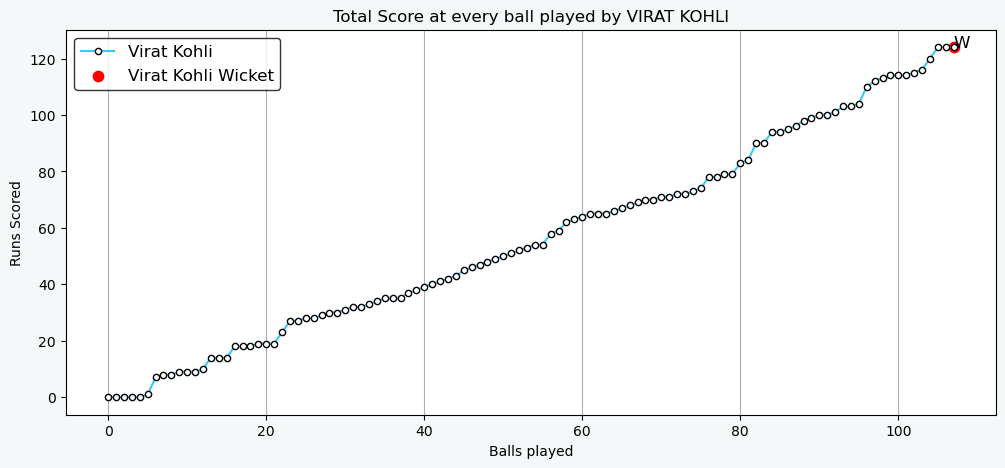

In [153]:
# Player wise graph of runs
plt.figure(figsize=(12,5),facecolor="#F4F8F9")
pn=input("Enter Player name:")
if pn in scorecard["Players"].values:
    pns=df[df["PlayerName"]==pn].reset_index()
    r=np.cumsum(pns["Score"])
    plt.plot(r,color="#35CAFE",marker=".",markersize=9,mfc="white",mec="black",label=pn)
    pl=pns.iloc[-1:]
    if pns[pns["Wicket"]=="Yes"]["Wicket"].values:
        plt.scatter(x=pl.index,y=r.values[-1],edgecolor="red",color="red",s=55,label=(f"{pn} Wicket"))
        plt.text(x=pl.index[-1],y=r.values[-1],s="W",family="sans-serif",size="large")
    plt.ylabel("Runs Scored")
    plt.xlabel("Balls played")
    plt.title(f"Total Score at every ball played by {pn.upper()}")
    plt.legend(fancybox=True,fontsize="large",edgecolor="black")
    plt.grid(axis="x")
    plt.show()
else:
    print("No player found.")

> *This line chart shows a series of events that happened in the time span of a player present on the crease.*

> *This graph shows a player's growth as per the circumstances kept in front of him to help his team achieve the target.*

## 

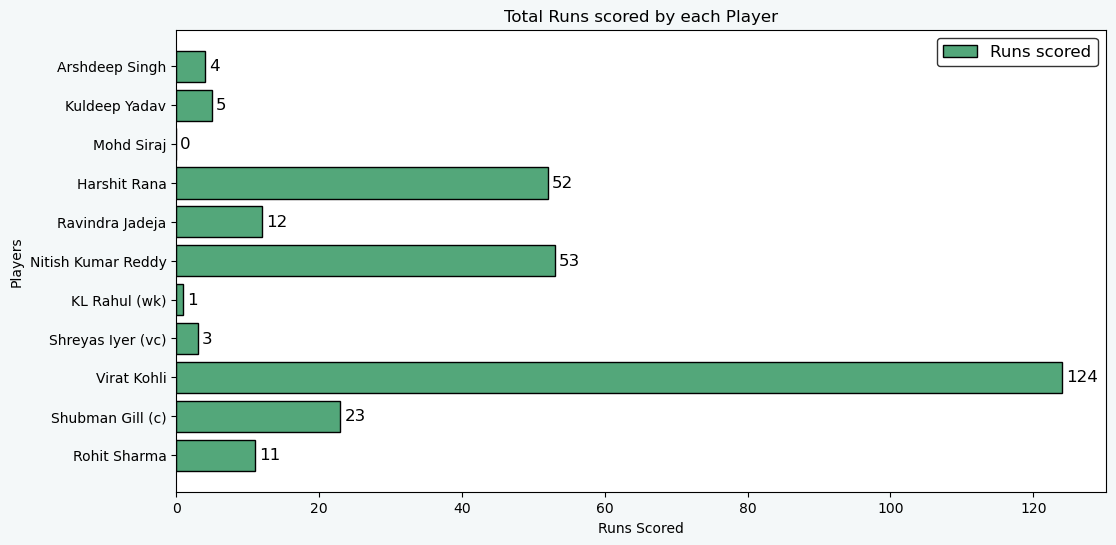

In [64]:
# Total runs scored by each player
plt.figure(figsize=(12,6),facecolor="#F4F8F9")
bar=plt.barh(scorecard["Players"],scorecard["Runs"],color="#53A77A",ec="black",label="Runs scored")
plt.bar_label(bar,padding=3,size=12)
plt.ylabel("Players")
plt.xlabel("Runs Scored")
plt.title("Total Runs scored by each Player")
plt.legend(fancybox=True,fontsize="large",edgecolor="black")
plt.show()

> *This bar chart shows total runs scored by each player individually helping in determining their impact & contribution (In terms of batting only) in the game.*

## 

In [65]:
scorecard["Players"].values

array(['Rohit Sharma', 'Shubman Gill (c)', 'Virat Kohli',
       'Shreyas Iyer (vc)', 'KL Rahul (wk)', 'Nitish Kumar Reddy',
       'Ravindra Jadeja', 'Harshit Rana', 'Mohd Siraj', 'Kuldeep Yadav',
       'Arshdeep Singh'], dtype=object)

Enter Player's name:Virat Kohli


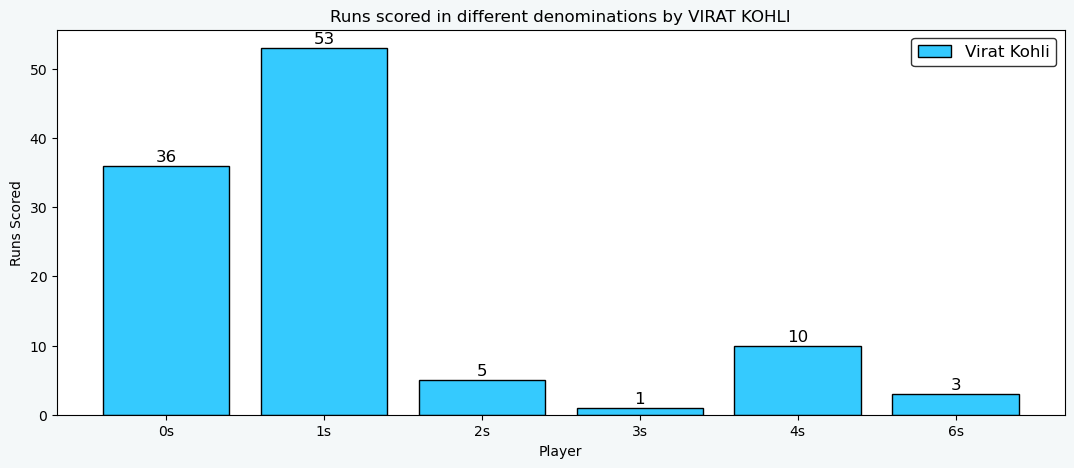

In [66]:
# Runs scored through different numbers by players
plt.figure(figsize=(13,5),facecolor="#F4F8F9")
name=input("Enter Player's name:")
c=scorecard[scorecard["Players"]==name]
n=["0s","1s","2s","3s","4s","6s"]
if name in scorecard["Players"].values:
    for k in range(len(n)):
        zero=plt.bar(height=c[n[k]],x=n[k],color="#35CAFE",ec="black")
        plt.bar_label(zero,padding=1,size=12)
else:
    print("Wrong Player name/Player not found.")
       
    
plt.legend([name],fontsize="large",fancybox=True,edgecolor="black")
plt.xlabel("Player")
plt.ylabel("Runs Scored")
plt.title(f"Runs scored in different denominations by {name.upper()}")
plt.show()

> *This bar chart shows the run-distribution of each individual player which helps us in analysing if the player is playing aggressive or defensively.*

## 

Enter Player's name:Virat Kohli


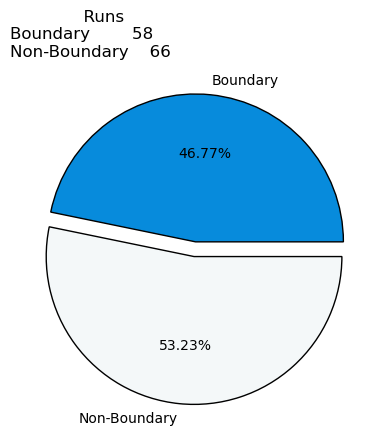

In [67]:
# % of boundaries/no-boundary runs scored by players
name=input("Enter Player's name:")
c=scorecard[scorecard["Players"]==name]
if name in scorecard["Players"].values:
    name=pd.DataFrame({"Runs":[int(c["Boundary Runs"].values),int(c["Non-Boundary Runs"].values)]},index=["Boundary","Non-Boundary"])
    plt.pie(x=name["Runs"],labels=list(name.index),autopct="%.2f%%",colors=["#078BDC","#F4F8F9"],explode=[0.05,0.05],wedgeprops={"edgecolor":"black"})
    # plt.scatter(0,0,color="black",s=70)  for marking the radius "dot"
else:
    print("Wrong Player name/Player not found.")
     
plt.title(label=name,loc="left")
plt.show()

> *This Pie-chart helps us in analysing each player's contribution via runs acquired through boundary or not again leading us towards player's approach of playing aggresively or defensively.*

## 

strike rate/run rate:strike rate


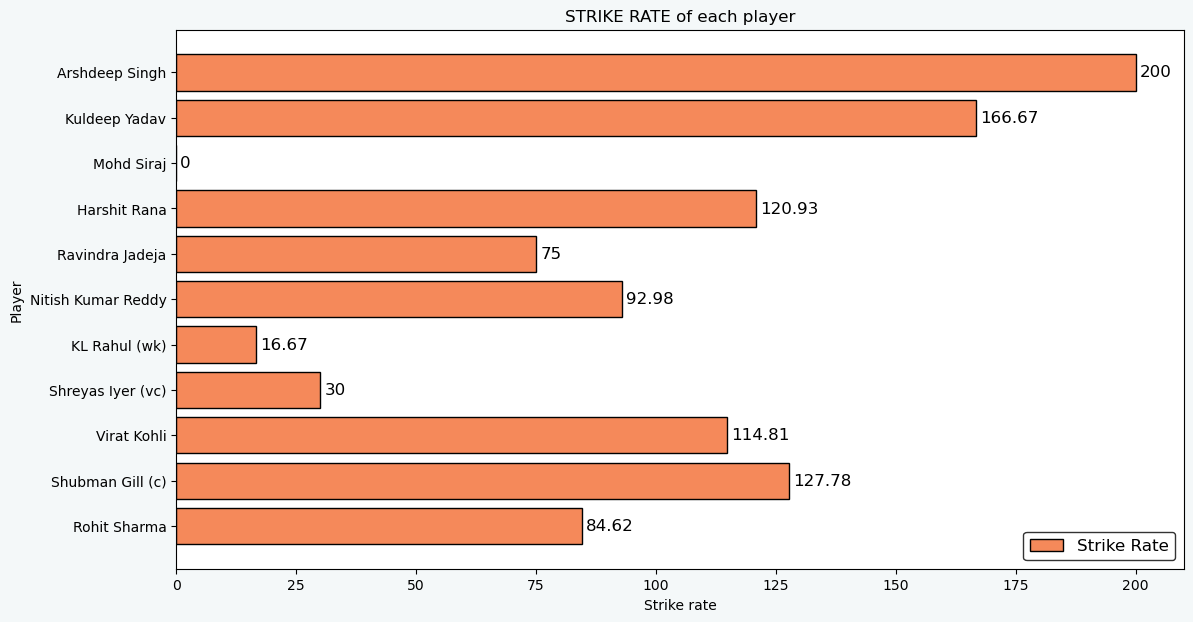

In [68]:
# Strike rate / Run rate of each player
plt.figure(figsize=(13,7),facecolor="#F4F8F9")
rate=input("strike rate/run rate:")
if rate=="strike rate":
    r=plt.barh(scorecard["Players"],scorecard["Strike Rate"],color="#F5895A",ec="black")
    plt.bar_label(r,padding=3,size=12)
elif rate=="run rate":
    r=plt.barh(scorecard["Players"],scorecard["Player Run Rate"],color="#F5895A",ec="black")
    plt.bar_label(r,padding=3,size=12)
else:
    print("Wrong feature input.")
       
    
plt.legend([rate.title()],fontsize="large",fancybox=True,edgecolor="black")
plt.ylabel("Player")
plt.xlabel(f"{rate.capitalize()}")
plt.title(f"{rate.upper()} of each player")
plt.show()

> *Bar graph representing strike rate of each player. Though it is not a mandatory parameter which shows a players's impact on the game. In some situations, it is a strong aspect like in a t-20 game whereas in a 50 over game, it may not be a matter of fact. Situations do affect a player's striking.*

> *Same goes for run-rate (players) because both strike rate and run rate are highly positively correlated to each other*

## 

<Axes: >

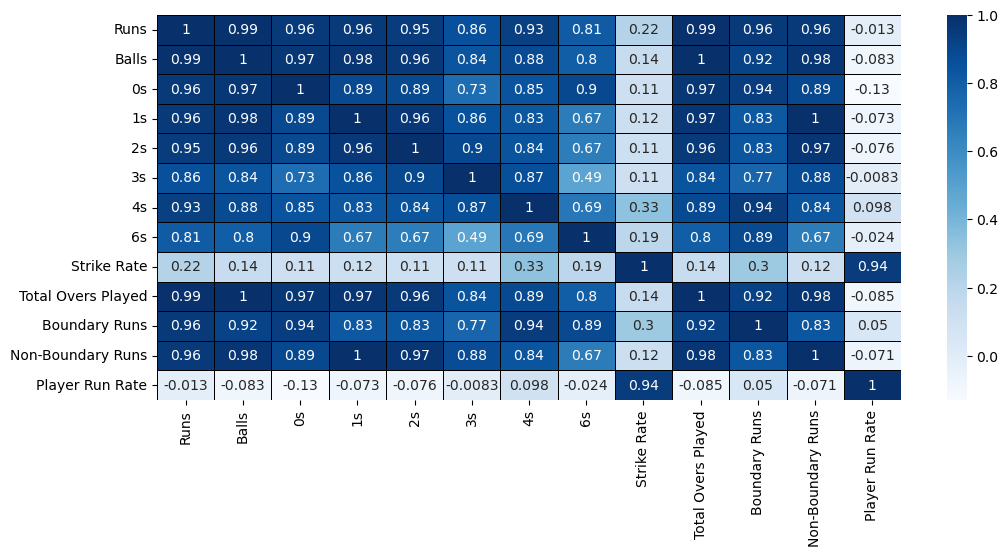

In [69]:
# correlation between numerical features

# value closer to 1 ---- highly correlated to each other, +ve correlation, variables incr/decr together
# value = 0 ----- no correlation
# value closer to -1 ---- less correlted to each other, -ve correlation, one incr as the other decr

plt.figure(figsize=(12,5))
sns.heatmap(scorecard.corr(),annot=True,linecolor="black",linewidths=0.5,cmap="Blues",fmt=".2g")

> *Correlation is the strongest factor between numerical features. It truely defines which all features goes along and which do not in a cricket game helping us in analysing a proper cricket match.*

## 

In [70]:
d=df.drop(df[df["PlayerName"]=="Extras"].index,axis=0)

In [71]:
# First names of players to avoid conflict on x-axis
fn=[k.split(" ")[0] for k in d["PlayerName"].values]

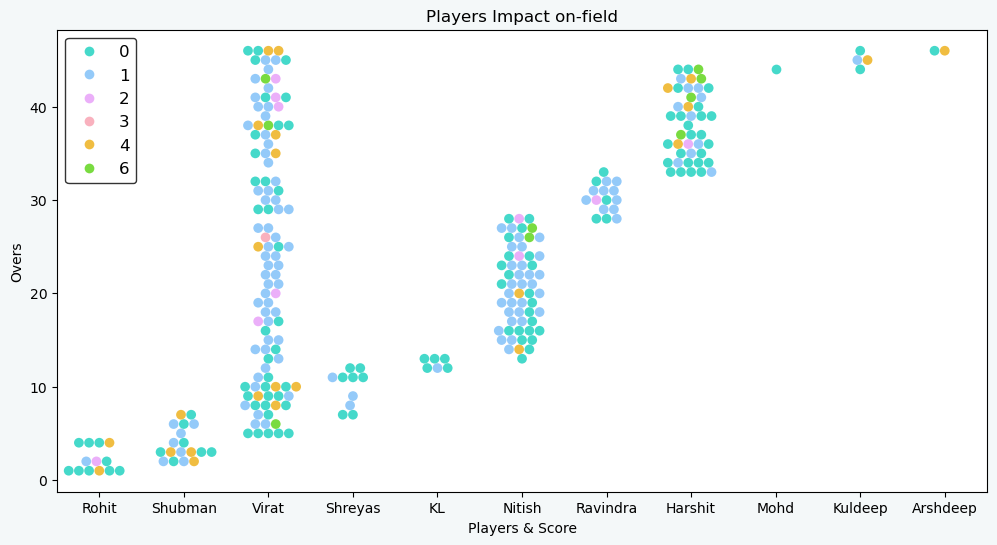

In [147]:
# Players contribution
plt.figure(figsize=(12,6),facecolor="#F4F8F9")
sns.swarmplot(x=fn,y=d["Overs"],hue=d["Score"],palette=sns.husl_palette(l=0.8,h=0.5),size=7)
plt.xlabel("Players & Score")
plt.title("Players Impact on-field")
plt.legend(fancybox=True,fontsize="large",edgecolor="black")

> *This plot shows a better representation of contribution by each player to the team score along with run distributions.*

> *This plot also gives an insight into over by over retention of players along with partnerships between players.*

### Overall - India Batting

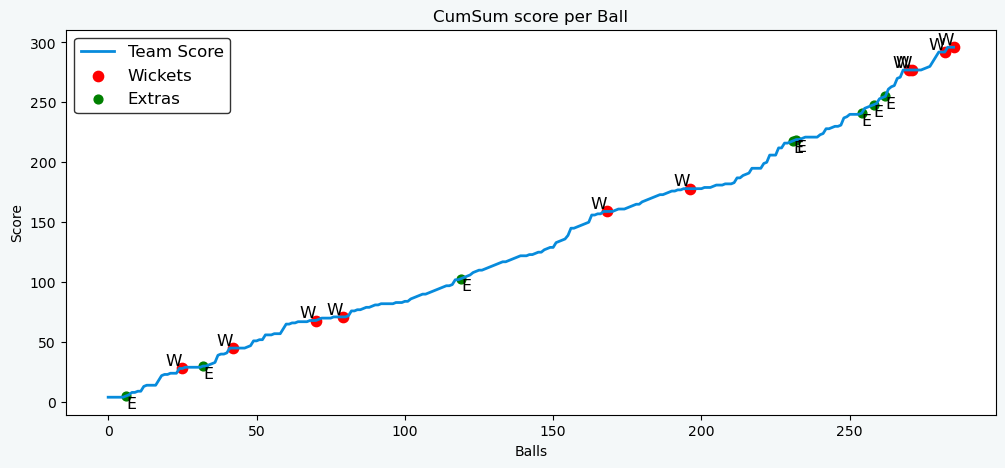

In [73]:
# Scorecard of Indian batting side via line chart
plt.figure(figsize=(12,5),facecolor="#F4F8F9",)
plt.plot(df["Cum-Sum Score"],color="#078BDC",linewidth=2,label="Team Score")
plt.scatter(x=list(wick.index),y=wick["Cum-Sum Score"],edgecolor="red",color="red",s=55,label="Wickets")
for k in range(len(list(wick.index))):
    plt.text(x=list(wick.index)[k],y=list(wick["Cum-Sum Score"])[k],s="W",family="sans-serif",va="bottom",ha="right",size="large")

plt.scatter(x=list(extra.index),y=extra["Cum-Sum Score"],edgecolor="green",color="green",s=40,label="Extras")
for k in range(len(list(extra.index))):
    plt.text(x=list(extra.index)[k],y=list(extra["Cum-Sum Score"])[k],s="E",family="monospace",va="top",ha="left",size="large")

plt.xlabel("Balls")
plt.ylabel("Score")
plt.title("CumSum score per Ball")
plt.legend(fancybox=True,fontsize="large",edgecolor="black")
plt.show()

> *This line chart visualises team India's batting scoreboard consisting of runs, wickets as well as extras.*

> *A line chart representing ball by ball runs scored by the team as a whole.* 

## 

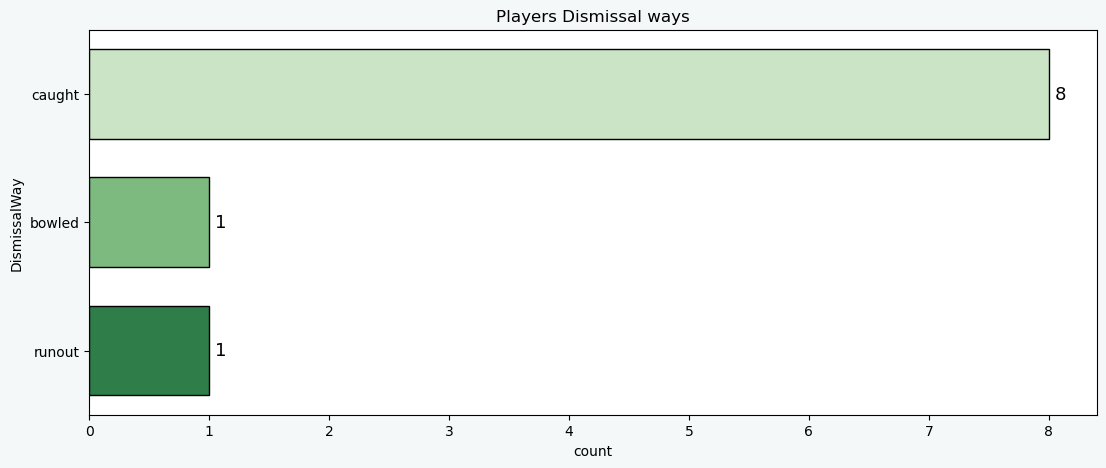

In [74]:
# Ways of Dismissal
plt.figure(figsize=(13,5),facecolor="#F4F8F9")
cp=sns.countplot(y=wick["DismissalWay"],width=0.7,palette="Greens",edgecolor="black")
for k in cp.containers:
    plt.bar_label(k,padding=4,fontsize=13)
plt.title("Players Dismissal ways")
plt.show()

> *Determining the ways wickets can fall can help a team in improving their way of battling with other team's capacity to outdone them.*

## 

In [75]:
# runs of overs with wickets ----- for proper plotting of wickets
rw=[]
for k in wick["Overs"]:
    o=Or["Runs Scored"][k-1]
    rw.append(o)
wick["Wicket over Runs"]=rw

In [76]:
rw

[5, 5, 2, 1, 3, 1, 7, 7, 12, 12]

In [77]:
# overs with wickets more than 1 ---- for proper scattering of wickets
ew=Or[Or["No. of Wickets"]>1]
ew

,Overs,Runs Scored,No. of Wickets,Run Rate after every Over
43,44,7,2,6.3
45,46,12,2,6.4


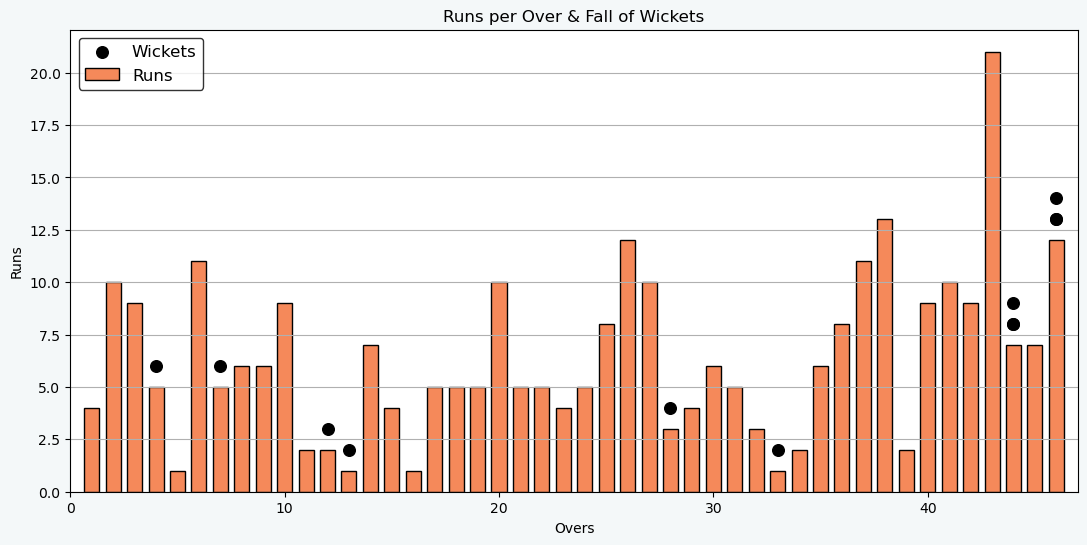

In [78]:
# Over wise runs scored & wickets
plt.figure(figsize=(13,6),facecolor="#F4F8F9")
plt.bar(Or["Overs"],Or["Runs Scored"],color="#F5895A",ec="black",width=0.7,label="Runs")
plt.scatter(wick["Overs"].values,(wick["Wicket over Runs"]+1),color="black",s=70,label="Wickets")    # "+1" to set the marker 
plt.scatter(ew["Overs"],ew["Runs Scored"]+2,color="black",s=70)     # "+2" to set the marker right above bar
plt.grid(axis="y")
plt.xlabel("Overs")
plt.ylabel("Runs")
plt.legend(fancybox=True,fontsize="large",edgecolor="black")
plt.title("Runs per Over & Fall of Wickets")
plt.xlim(0,47)
plt.show()

> *An over-by-over computation of runs as well as wickets explained via bar graph is a way of explaining team's dominance level and hence also evaluating team's overall batting performance.*

> *This chart also helps in keeping a charge of changes in momentum by the team in every situation they fall in.*

## 

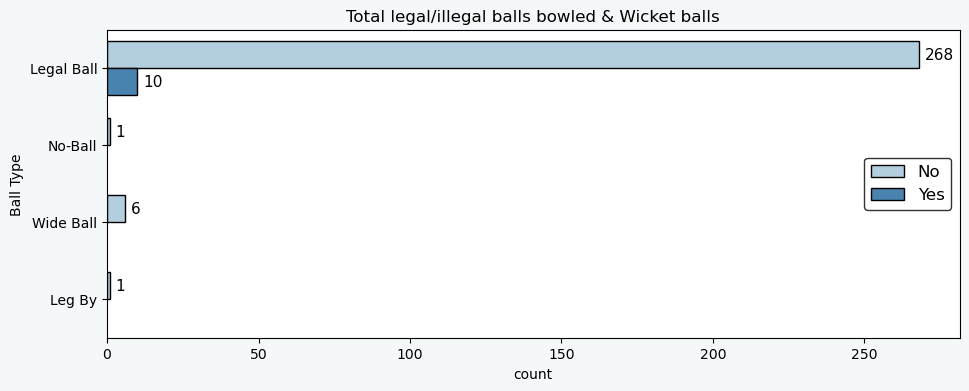

In [79]:
# different balls bowled in the match 
plt.figure(figsize=(11,4),facecolor="#F4F8F9")
cp=sns.countplot(y=df["Ball Type"],width=0.7,palette="Blues",edgecolor="black",hue=df["Wicket"])
for k in cp.containers:
    plt.bar_label(k,padding=4,fontsize=11)
plt.title("Total legal/illegal balls bowled & Wicket balls")
plt.legend(loc=7,fancybox=True,fontsize="large",edgecolor="black")
plt.show()

> *Density of fair/unfair balls tells us about the bowling team's take on the situation of the game as well as their plan/strategy for the game.*

> *Whereas falling of wickets on any type of ball is purely a team effort which can based on plans executed by them.*

## 

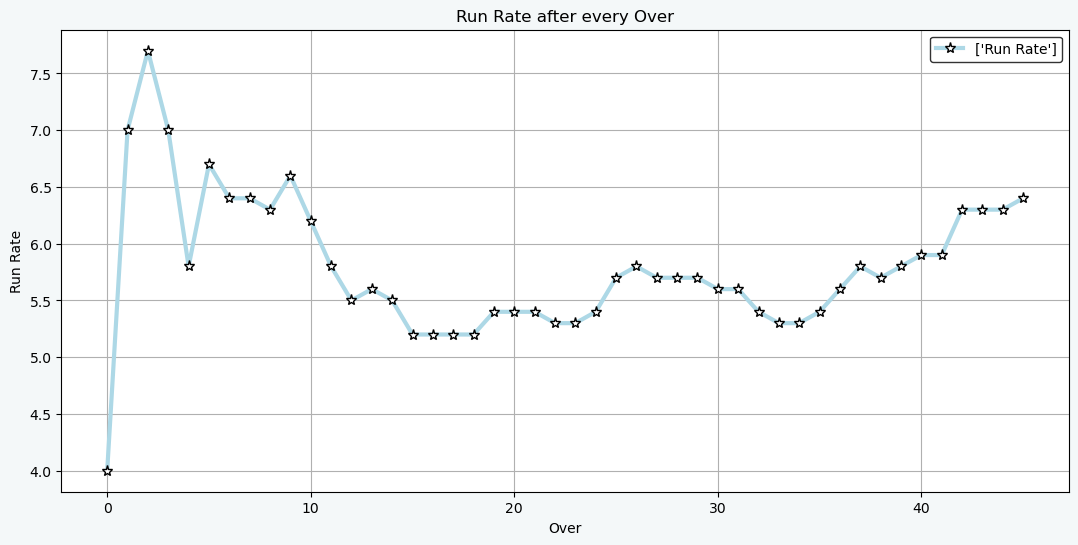

In [80]:
# Cum-Sum Run rate of team's batting 
plt.figure(figsize=(13,6),facecolor="#F4F8F9")
plt.plot(Or["Run Rate after every Over"],marker="*",markersize=8,color="lightblue",mfc="white",mec="black",linewidth=3,label=["Run Rate"])
plt.xlabel("Over")
plt.ylabel("Run Rate")
plt.title("Run Rate after every Over")
plt.grid()
plt.legend(fancybox=True,fontsize="medium",edgecolor="black")
plt.show()

> *Cum-Sum run rate meaning run rate of the team after a certain number of overs have been bowled. eq: after 5 overs the rr (run rate) is around 5.7 (as we can see from the graph) and so on...*

> *This line chart shows over-by-over India's way of adapting and respecting the game's situation.*

## 

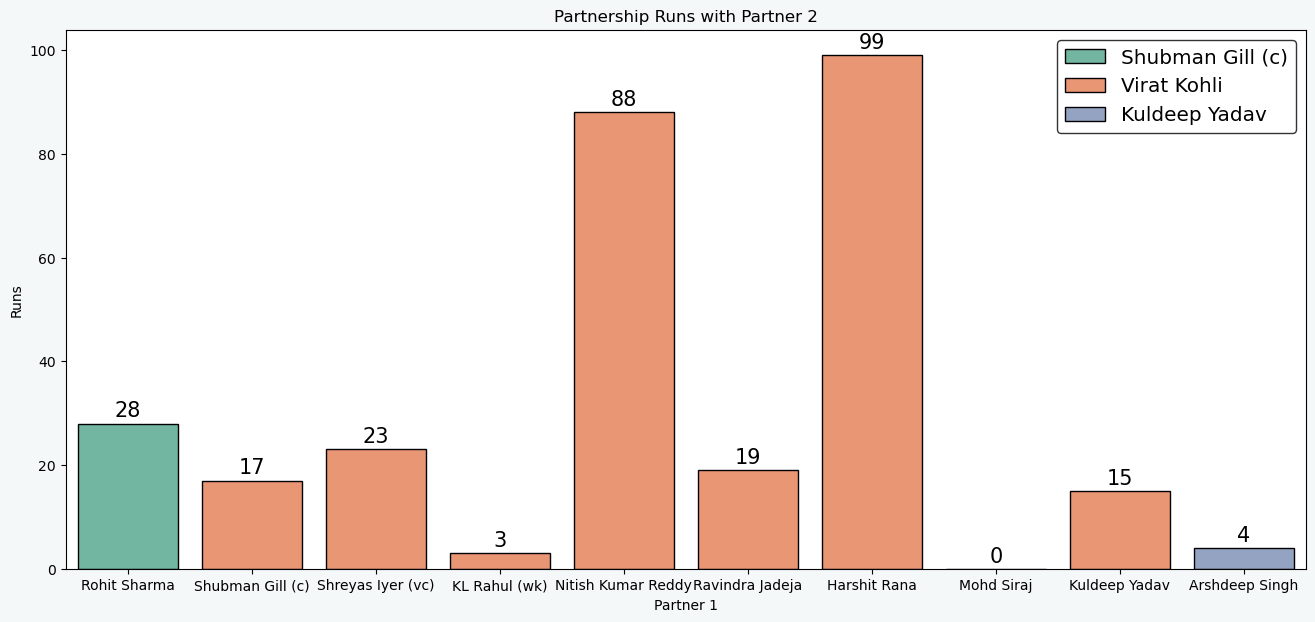

In [148]:
# Partnership scoreboard
plt.figure(figsize=(16,7),facecolor="#F4F8F9")
bp=sns.barplot(data=partner,x="Partner1",y="Runs Scored",hue="Partner2",palette="Set2",ec="black")
for k in bp.containers:
    plt.bar_label(k,fontsize=15,padding=2)
plt.legend(fancybox=True,fontsize="x-large",edgecolor="black")
plt.xlabel("Partner 1")
plt.ylabel("Runs")
plt.title("Partnership Runs with Partner 2")
plt.show()

> *Partnerships play a crucial part in a game especially cricket, they have the power to make or break the game. And the above bar chart shows partnerships between players which hence helps us in analysing players who can coordinate together given the condition to play in some circumstances.*

## 

In [106]:
# grouped as per their role
bm=scorecard.groupby(by=scorecard["Role"])
bm.groups.keys()

dict_keys(['All-Rounder', 'Batsman', 'Bowler'])

In [105]:
# aggregate of runs by each group
batsum=bm.get_group("Batsman")["Runs"].sum()
allsum=bm.get_group("All-Rounder")["Runs"].sum()
bowlsum=bm.get_group("Bowler")["Runs"].sum()

In [109]:
# assembled into a single dataframe
bbas=pd.DataFrame({"Runs":[allsum,batsum,bowlsum]},index=list(bm.groups.keys()))
bbas

,Runs
All-Rounder,65
Batsman,162
Bowler,61


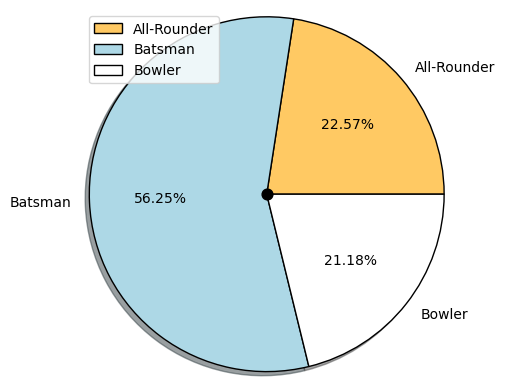

In [146]:
# contribution by batsman, bowlers & all-rounders
plt.pie(bbas["Runs"],autopct="%.2f%%",wedgeprops={"edgecolor":"black"},colors=["#FFC963","lightblue","white"],labels=bbas.index,
        shadow=True,radius=1.2,)
plt.scatter(0,0,color="black",s=60)
plt.legend(loc=2)
plt.show()

> *A division of run distribution between types of players present in the team can make a huge difference and the above plotted pie-chart is an example of that.*

## 

# FINAL ANALYSIS

> * The game of Cricket is unpredictable, no one can guess what's gonna happen around the corner. A big partnership between players can make things look great and easy but on the other side as soon as that partnership is over, building a new one along while also respecting various things going on in the game is a challenge itself. 
And this match was a true example of that, some partnerships went well one after another but some didn't as well.

> * Keeping statistics in mind, we can say that Virat Kohli who played with a strike rate of 114.81, backed 8 partnerships having 2 of them to be successful ones with Nitish Kumar Reddy(All-Rounder) & Harshit Rana(Bowler),  scored a total of 124 runs off 108 balls, with more than 50% of runs through no boundaries is an instance of a player who knows how to keep the game alive even when wickets were falling frequently.*

> * "Game awareness" is that aspect of a game which when developed can turn an unfavouring situation to the best situation ever posssible. And Nitish Kumar Reddy who scored 53 runs off 57 balls & Harshit Rana with 52 runs off 43 balls proved this fact. 

> * Stats are not the only thing which defines a player's contribution, they are meant to be recorded but not to be  kept in mind because it is the mindset-positive mindset which backs a player as well as his team.

> * Modern day cricket is changing where not only batters or all rounders are contributing while batting but also bowlers are now capable of taking the responsibility on their head.

> * At last, what matters the most is the impact a player can have in this game. Every day can't be yours but you can try and try time and again to make a little of it yours even when the circumstances demand different.